In [100]:
import pandas as pd
import numpy as np

# makeing up a dataset
name = ['Bob', 'Tom', 'Lily', 'Sharon', 'Fiona', 'Daisy', 'Xiaoming', 'Xiaohong', 'Dave', 'Love', 'Tod']
age = [20, 19, 21, 30, 35, 40, 28]
education = ['bachelor ', 'master', 'doctor', 'post-doctor']
nationality = ['Australia', 'China', 'US', 'UK', 'Singapore','Italy']
yearsInAustralia = [10, 20, 30, 5]
gender = ['Male', 'Female']
health = ['below average', 'average', 'above average']

np.random.seed(100)

Names = [name[np.random.randint(low=0, high=len(name))] for i in range(1000)]
Age = [age[np.random.randint(low = 0, high = len(age))] for i in range(1000)]
Education = [education[np.random.randint(low=0, high=len(education))] for i in range(1000)]
Nationality = [nationality[np.random.randint(low=0, high=len(nationality))] for i in range(1000)]
YearsInAustralia = [yearsInAustralia[np.random.randint(low=0, high=len(yearsInAustralia))] for i in range(1000)]
Gender = [gender[np.random.randint(low=0, high=len(gender))] for i in range(1000)]
Health = [health[np.random.randint(low=0, high=len(health))] for i in range(1000)]

Data = list(zip(Names, Age, Education, Nationality, YearsInAustralia, Gender, Health))

date = pd.date_range(start = '2008/1/1', end = '2020/1/1', freq = 'M')
Date = [date[np.random.randint(low=0, high=len(date))] for i in range(1000)]

df = pd.DataFrame(data = Data, index = Date, columns = ['Names', 'Age', 'Education', 'Nationality', 'YearsInAustralia', 'Gender', 'Health'])

df.head()

,Names,Age,Education,Nationality,YearsInAustralia,Gender,Health
2015-07-31,Dave,21,doctor,Italy,5,Female,above average
2012-04-30,Dave,28,post-doctor,UK,30,Male,average
2010-11-30,Sharon,40,master,US,10,Male,average
2011-09-30,Xiaohong,35,post-doctor,UK,5,Female,average
2016-11-30,Xiaohong,30,doctor,Australia,20,Male,above average


In [101]:
# data inspection
df.info()
# there are 1000 rows with no missing data and 7 columns with no wrong datatype.

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1000 entries, 2015-07-31 to 2014-07-31
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Names             1000 non-null   object
 1   Age               1000 non-null   int64 
 2   Education         1000 non-null   object
 3   Nationality       1000 non-null   object
 4   YearsInAustralia  1000 non-null   int64 
 5   Gender            1000 non-null   object
 6   Health            1000 non-null   object
dtypes: int64(2), object(5)
memory usage: 62.5+ KB


In [102]:
df.describe()

,Age,YearsInAustralia
count,1000.00000,1000.000000
mean,27.30000,16.310000
std,7.40546,9.611258
min,19.00000,5.000000
25%,20.00000,10.000000
50%,28.00000,20.000000
75%,35.00000,30.000000
max,40.00000,30.000000


In [103]:
df = df.sort_index(axis = 0)
df.head(20)

,Names,Age,Education,Nationality,YearsInAustralia,Gender,Health
2008-01-31,Tom,20,bachelor,China,5,Male,average
2008-01-31,Love,19,doctor,China,10,Female,above average
2008-01-31,Bob,20,master,US,20,Female,average
2008-01-31,Xiaohong,28,post-doctor,Singapore,5,Male,average
2008-01-31,Bob,19,master,Australia,10,Female,above average
2008-01-31,Tom,35,doctor,UK,5,Male,above average
2008-01-31,Dave,35,doctor,Italy,10,Female,average
2008-02-29,Daisy,19,post-doctor,Singapore,20,Female,average
2008-02-29,Tom,21,master,Italy,30,Female,below average
2008-02-29,Sharon,40,master,Italy,30,Male,below average


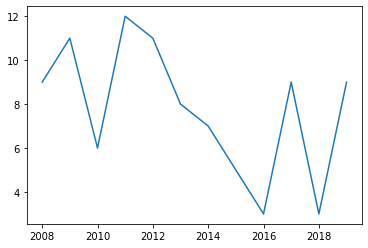

In [125]:
# want to know if the popularity of names is changing with time
## need to know sum of one name in different years
df['name_count'] = 1
df.head(20)
#df['Names'] = df.Names.apply(lambda x:x.upper())
countNames = df.reset_index().groupby(['Names', df.index.year]).sum()
countNames.loc['BOB','name_count'].plot()


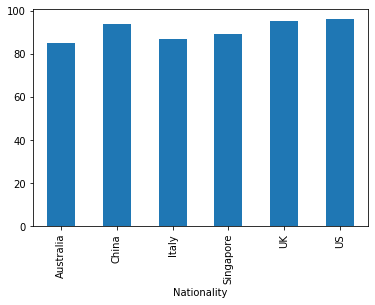

In [132]:
# A similar example is are ther more males migrants than female migrants that from different country?
df['count'] = 1
gender_counts = df.reset_index().groupby(['Gender', 'Nationality']).sum()
gender_counts.head(20)
gender_counts.loc['Female','count'].plot.bar()
gender_counts.loc['Male','count'].plot.bar()